In [ ]:
import modi

In [ ]:
bundle = modi.MODI()

In [1]:
import cv2
from numpy import ndarray
import numpy as np
from PIL import Image
from IPython import display as Idisplay
from io import BytesIO
from typing import List
from usb import core
import time

t1 = time.time()
t2 = time.time()


def array_to_image(frame: ndarray, format: str = 'jpeg'):
    try:
        # Create binary stream object
        f = BytesIO()
        # Convert array to binary stream object
        Image.fromarray(frame).save(f, format)
        return Idisplay.Image(data=f.getvalue())
    except:
        pass

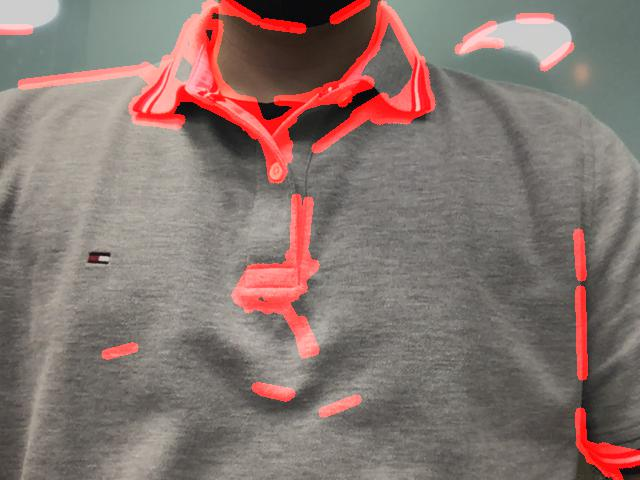

In [2]:
cap = cv2.VideoCapture(0)
cap.set(3,320)
cap.set(4,240)

d = Idisplay.display("Window", display_id=1)
d2 = Idisplay.display("Frame Rate", display_id=2)

for i in range(200):
    try:
        t1 = time.time()
        _, frame = cap.read()
        frame = cv2.flip(frame, 1)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        im = array_to_image(frame)
        t2 = time.time()
        s = f"{int(1 / (t2 - t1))} FPS"
        d.update(im)
        d2.update(Idisplay.HTML(s))
    except:
        pass

In [3]:
# 윤곽선 추출
# Canny 이미지 처리함수
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

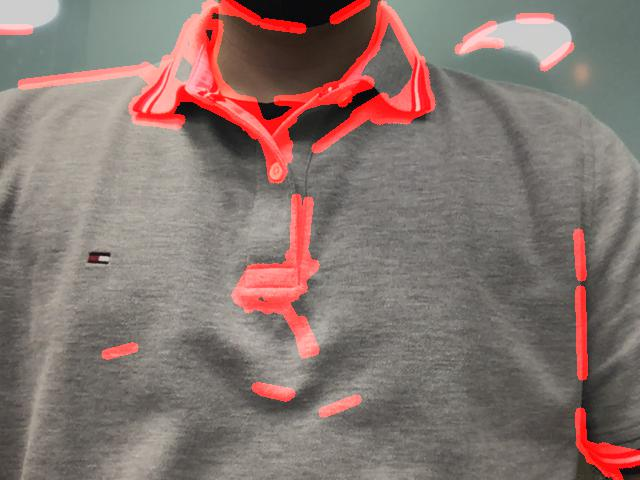

In [4]:
cap = cv2.VideoCapture(0)
cap.set(3,320)
cap.set(4,240)

d = Idisplay.display("Window", display_id=1)
d2 = Idisplay.display("Frame Rate", display_id=2)

for i in range(200):
    try:
        t1 = time.time()
        _, frame = cap.read()
        frame = cv2.flip(frame, 1)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = canny(frame)
        im = array_to_image(frame)
        t2 = time.time()
        s = f"{int(1 / (t2 - t1))} FPS"
        d.update(im)
        d2.update(Idisplay.HTML(s))
    except:
        pass

In [7]:
def hough_transform(image):
    rho = 7              #Distance resolution of the accumulator in pixels.
    theta = np.pi/180    #Angle resolution of the accumulator in radians.
    threshold = 41       #Only lines that are greater than threshold will be returned.
    minLineLength = 25   #Line segments shorter than that are rejected.
    maxLineGap = 20     #Maximum allowed gap between points on the same line to link them
    
    return cv2.HoughLinesP(image, rho = rho, theta = theta, threshold = threshold,
                           minLineLength = minLineLength, maxLineGap = maxLineGap)

def t_display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image

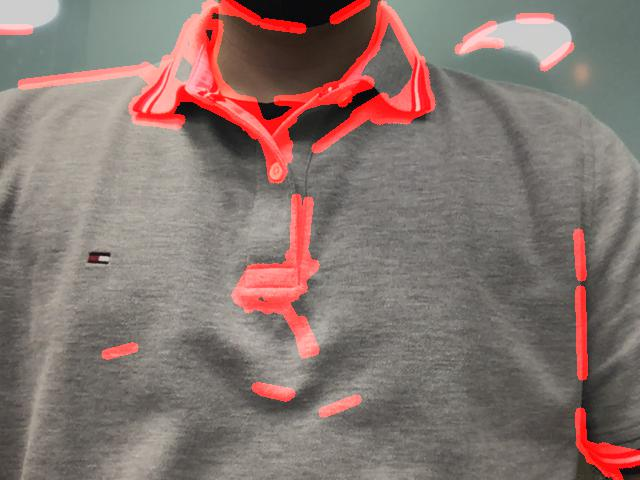

In [10]:
cap = cv2.VideoCapture(0)
cap.set(3,320)
cap.set(4,240)

d = Idisplay.display("Window", display_id=1)
d2 = Idisplay.display("Frame Rate", display_id=2)

for i in range(200):
    try:
        t1 = time.time()
        _, frame = cap.read()
        cframe = frame.copy()
        frame = cv2.flip(frame, 1)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        cannyframe = canny(frame)
#         lines = cv2.HoughLinesP(cannyframe, 1, np.pi/180, minLineLength=10, maxLindGap=10)
        lines = hough_transform(cannyframe)
        frame_lines = t_display_lines(frame, lines)
        combo_image = cv2.addWeighted(frame, 0.8, frame_lines, 1, 1)
        
        im = array_to_image(combo_image)
        t2 = time.time()
        s = f"{int(1 / (t2 - t1))} FPS"
        d.update(im)
        d2.update(Idisplay.HTML(s))
    except:
        pass

In [ ]:
import cv2
import numpy as np
img = cv2.imread('test.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
cv2.imshow('edges',img)